In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/Ufynd/

/content/drive/My Drive/Colab Notebooks/Ufynd


In [4]:
import sys
sys.path.append('../')
import shutil
import os
import pandas as pd
import numpy as np
from datetime import date, timedelta
from pathlib import Path

# from src.plots import PlotMaker
# from content.drive.MyDrive.Colab Notebooks/Ufynd/src/plots.py import PlotMaker

In [5]:
 !pwd

/content/drive/My Drive/Colab Notebooks/Ufynd


Have added another method below called plot_LAR_hotel for  visualization of the rates for each hotel for all the target dates.

In [15]:
import plotly.graph_objects as go


class PlotMaker:

    @staticmethod
    def _xaxis_template(title: str) -> dict:
        """Returns default settings for x axes with slider

        Args:
            title: name of the axes

        Returns:
            dictionary with description of x axes
        """

        return dict(
            rangeselector=dict(
                buttons=list([
                    dict(
                        count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                    dict(
                        count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                    dict(
                        count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                    dict(
                        count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True),
            type="date",
            title_text=title)

    @staticmethod
    def _yaxis_template(
            title: str,
            autorange: str = True) -> dict:
        """Returns default settings for y axes

        Args:
            title (str): name of the axes
            autorange (str): 'reversed'. Defaults to True

        Returns:
            dictionary with description of y axes
        """

        return dict(
            title_text=title,
            autorange=autorange)

    @classmethod
    def plot_LAR(
            cls,
            df: pd.DataFrame,
            target_date: date,
            HotelIds: list) -> go.Figure:
        """Makes line chart of market data per target date

        Args:
            df (pd.DataFrame): Pandas DataFrame with marker data
            target_date (date): Target date.
            HotelIds (list): List of hotel ids.

        Returns:
            go.Figure: Figure with rate evolution over time
        """

        title = 'Rate Development, ' + target_date.strftime("%d %B, %Y")

        snapshot_dates = [
            target_date - timedelta(days=int(x)) for x in df.keys()]

        fig = go.Figure()

        for hotel_id in HotelIds:

            if hotel_id in df.index:

                rates = df[df.index == hotel_id].values[0].tolist()

                fig.add_trace(go.Scatter(
                    x = snapshot_dates,
                    y = rates,
                    mode = 'lines+markers',
                    name = f'Hotel {hotel_id}',
                ))

            else:

                raise ValueError('`HotelIds` must exist in pandas df index.')


        fig.update_layout(
            title=title,
            xaxis=cls._xaxis_template("Snapshot Date"), 
            yaxis=cls._yaxis_template("LAR, EUR", True),
            hovermode="x",
            showlegend=True)

        return fig

    @classmethod
    def plot_LAR_hotel(
            cls,
            hotel_id: str,
            df: pd.DataFrame,
            target_date: date,
            TargetDates: list) -> go.Figure:
        """Makes line chart of market data per target date

        Args:
            df (pd.DataFrame): Pandas DataFrame with marker data
            target_date (date): Target date.
            HotelIds (list): List of hotel ids.

        Returns:
            go.Figure: Figure with rate evolution over time
        """

        # title = 'Rate Development, ' + target_date.strftime("%d %B, %Y")
        title = 'Rate Development for the hotel ' + hotel_id

        snapshot_dates = [
            target_date - timedelta(days=int(x)) for x in df.keys()]

        fig = go.Figure()

        for target_date in TargetDates:

            if target_date in df.index:

                rates = df[df.index == target_date].values[0].tolist()

                fig.add_trace(go.Scatter(
                    x = snapshot_dates,
                    y = rates,
                    mode = 'lines+markers',
                    name = f'July {target_date+1}',
                ))

            else:

                raise ValueError('`Target dates` must exist in pandas df index.')


        fig.update_layout(
            # title=title,
            # xaxis=cls._xaxis_template("Snapshot Date"), 
            # yaxis=cls._yaxis_template("LAR, EUR", True),
            # hovermode="x",
            # showlegend=True
            title=title,
            width=1000,
            height=500,
            xaxis=cls._xaxis_template("Snapshot Date"), 
            yaxis=cls._yaxis_template("LAR, EUR", True),
            hovermode="x",
            margin=go.layout.Margin(
                l=50,
                r=50,
                b=100,
                t=100,
                pad = 4
            ),
            showlegend=True)
          

        return fig

# Market Data

The folder `/data` contains files with the lowest available rates (LAR) of a double room for all hotels in Berlin in July 2019. 

For convenience, these rates are gathered on the target date basis, thus 31 files are covering all days from July 1 till July 31, 2019.  

For a single day, say the 7th of July 2019 the data have the following structure:

In [ ]:
target_date = date(2019,7,15)

target_date_str = target_date.strftime('%Y-%m-%d')
filename = f'./data/LAR_Berlin_{target_date_str}.csv'

print(filename)

./data/LAR_Berlin_2019-07-15.csv


In [ ]:
df = pd.read_csv(filename, index_col='hotelid')
df.head()

,360,350,340,330,320,310,300,290,280,270,...,9,8,7,6,5,4,3,2,1,0
hotelid,,,,,,,,,,,,,,,,,,,,,
35,263.0,263.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,...,84.0,84.0,84.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
37,72.0,80.0,72.0,80.0,72.0,72.0,72.0,72.0,72.0,72.0,...,72.0,72.0,72.0,72.0,72.0,80.0,80.0,80.0,80.0,80.0
38,152.0,152.0,152.0,152.0,152.0,137.0,137.0,137.0,137.0,137.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,152.0,152.0,152.0
39,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,...,116.0,116.0,116.0,116.0,116.0,116.0,116.0,129.0,129.0,129.0
40,86.0,84.0,114.0,114.0,114.0,114.0,114.0,102.0,102.0,90.0,...,73.0,73.0,75.0,79.0,78.0,75.0,75.0,82.0,75.0,75.0


In [ ]:
df.shape

(973, 72)

In [ ]:
df.index

Int64Index([     35,      37,      38,      39,      40,      41,      42,
                 43,      44,      46,
            ...
            1334595, 1334605, 1335847, 1337799, 1348446, 1348448, 1353536,
            1358772, 1360114, 1364878],
           dtype='int64', name='hotelid', length=973)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
360,303.0,115.680871,91.083924,1.004,75.0,90.0,123.0,838.0
350,335.0,119.523293,94.282612,1.004,77.5,91.0,124.0,838.0
340,319.0,114.750169,79.060153,1.004,76.5,92.0,119.5,650.0
330,405.0,117.516800,88.062689,1.004,76.0,91.0,124.0,799.0
320,428.0,118.451636,97.149251,2.300,75.0,90.0,121.5,999.0
...,...,...,...,...,...,...,...,...
4,662.0,98.424471,61.534976,36.000,69.0,84.0,104.0,683.0
3,651.0,96.986175,57.067206,28.000,69.0,84.0,104.0,683.0
2,636.0,98.349057,54.294770,25.000,69.0,85.0,105.0,550.0
1,628.0,98.006369,53.650234,16.000,69.0,85.0,105.0,550.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 35 to 1364878
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   360     303 non-null    float64
 1   350     335 non-null    float64
 2   340     319 non-null    float64
 3   330     405 non-null    float64
 4   320     428 non-null    float64
 5   310     448 non-null    float64
 6   300     463 non-null    float64
 7   290     486 non-null    float64
 8   280     495 non-null    float64
 9   270     475 non-null    float64
 10  260     515 non-null    float64
 11  250     521 non-null    float64
 12  240     557 non-null    float64
 13  230     568 non-null    float64
 14  220     581 non-null    float64
 15  210     593 non-null    float64
 16  200     612 non-null    float64
 17  190     611 non-null    float64
 18  180     616 non-null    float64
 19  170     641 non-null    float64
 20  160     655 non-null    float64
 21  150     657 non-null    float64
 2

In [ ]:
# A record for a hotel
df.loc[[35]]

,360,350,340,330,320,310,300,290,280,270,...,9,8,7,6,5,4,3,2,1,0
hotelid,,,,,,,,,,,,,,,,,,,,,
35,263.0,263.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,...,84.0,84.0,84.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [ ]:
temp_df = df.fillna(0)

In [ ]:
temp_df

,360,350,340,330,320,310,300,290,280,270,...,9,8,7,6,5,4,3,2,1,0
hotelid,,,,,,,,,,,,,,,,,,,,,
35,263.0,263.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,...,84.0,84.0,84.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
37,72.0,80.0,72.0,80.0,72.0,72.0,72.0,72.0,72.0,72.0,...,72.0,72.0,72.0,72.0,72.0,80.0,80.0,80.0,80.0,80.0
38,152.0,152.0,152.0,152.0,152.0,137.0,137.0,137.0,137.0,137.0,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,152.0,152.0,152.0
39,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,93.0,...,116.0,116.0,116.0,116.0,116.0,116.0,116.0,129.0,129.0,129.0
40,86.0,84.0,114.0,114.0,114.0,114.0,114.0,102.0,102.0,90.0,...,73.0,73.0,75.0,79.0,78.0,75.0,75.0,82.0,75.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1353536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.0,89.0,89.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0
1358772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,233.0,233.0,233.0,233.0,233.0,233.0,233.0,233.0,233.0,0.0


In [ ]:
temp_df = temp_df.reset_index()

In [ ]:
temp_df["hotelid"].head(15)

0     35
1     37
2     38
3     39
4     40
5     41
6     42
7     43
8     44
9     46
10    47
11    48
12    49
13    53
14    55
Name: hotelid, dtype: int64

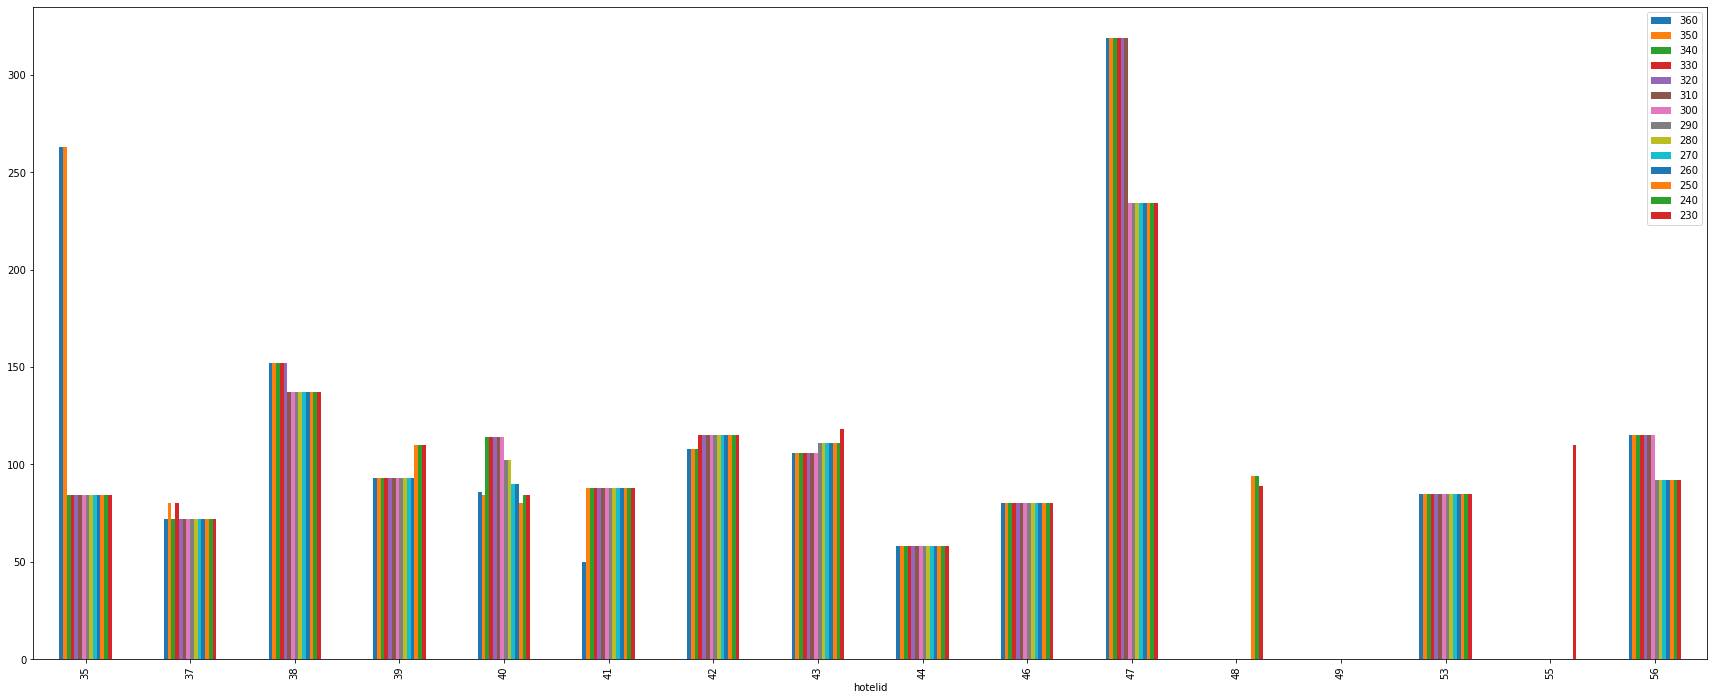

In [ ]:
import matplotlib.pyplot as plt
# plot multiple columns such as population and year from dataframe
# temp_df = temp_df.T
temp_df1 = temp_df.loc[:15,:]
columns = temp_df1.columns[1:15].tolist()
# indecies = temp_df.index[1:15].tolist()
temp_df1.plot(x="hotelid", y=columns,
        kind="bar", figsize=(30, 12))
# temp_df.plot(x=indecies, y=columns,
#         kind="line", figsize=(30, 12))

# display plot
plt.show()

In [ ]:
dict_of_hotels = {} # Create a dictionary containing each hotel and its respective dataframe which contains the rates for each of the day in July i.e. all lead times for one hotel in one place

for july_date in range(31):  # Since we have hotels for only month of july so we are iterating for 31 days to read all csv
  # df = read_csv(july_date)

  target_date = date(2019,7,july_date+1)
  target_date_str = target_date.strftime('%Y-%m-%d')
  filename = f'./data/LAR_Berlin_{target_date_str}.csv'
  df = pd.read_csv(filename, index_col='hotelid')

  for id in df.index: # For each hotel id in the index of the dataframe for a particular date
    df_hotelid = f"df_{id}"
    first_time_hotel_flag = False 

    if df_hotelid not in dict_of_hotels.keys():
      first_time_hotel_flag = True  # If the hotel is already not added in the dictionary of hotels
      dict_of_hotels.update({df_hotelid: pd.DataFrame()}) # Create empty dataframes for each hotel

    temp_df = dict_of_hotels[df_hotelid]  # Create a temporary dataframe for a hotel

    if july_date==0 or first_time_hotel_flag:
      temp_df = df.loc[[id]]  # For the first time, take the record which is matching for the hotel id in the csv and create the temporary dataframe for that hotel
      # print("yes")
    else:
      total_number_of_indicies = str(len(temp_df.index))  # Since, if it is in else part then dataframe is already created and have one row , so the records will be added subsequently
      # print(july_date+1)
      # print(total_number_of_indicies)
      for column in df.keys():
        # print(column)
        temp_df.loc[total_number_of_indicies, column] = df.loc[id, f'{column}']

      # Reorder the columns of the DataFrame in decreasing order:
      cols = temp_df.columns.tolist()
      cols = list(map(int, cols))
      cols.sort(reverse=True)
      cols = list(map(str, cols))
      temp_df = temp_df[cols]

    dict_of_hotels[df_hotelid] = temp_df  # Assign back the temporary dataframe to the respective hotel dataframe in the original dictionary

In [ ]:
# Get the total number of hotels in our dataset
len(dict_of_hotels)

1151

In [ ]:
# A view into the datasets in the dictionary of hotels
dict_of_hotels.keys()

dict_keys(['df_35', 'df_37', 'df_38', 'df_39', 'df_40', 'df_41', 'df_42', 'df_43', 'df_44', 'df_46', 'df_47', 'df_48', 'df_49', 'df_53', 'df_55', 'df_56', 'df_57', 'df_58', 'df_59', 'df_60', 'df_61', 'df_62', 'df_63', 'df_64', 'df_65', 'df_67', 'df_70', 'df_71', 'df_72', 'df_74', 'df_78', 'df_79', 'df_80', 'df_81', 'df_85', 'df_86', 'df_87', 'df_89', 'df_90', 'df_92', 'df_93', 'df_94', 'df_95', 'df_96', 'df_97', 'df_99', 'df_100', 'df_101', 'df_104', 'df_105', 'df_106', 'df_107', 'df_108', 'df_109', 'df_110', 'df_111', 'df_112', 'df_113', 'df_114', 'df_115', 'df_116', 'df_118', 'df_119', 'df_120', 'df_121', 'df_122', 'df_123', 'df_124', 'df_125', 'df_127', 'df_128', 'df_129', 'df_131', 'df_132', 'df_133', 'df_134', 'df_135', 'df_136', 'df_138', 'df_139', 'df_141', 'df_142', 'df_143', 'df_144', 'df_147', 'df_148', 'df_149', 'df_150', 'df_151', 'df_155', 'df_157', 'df_159', 'df_160', 'df_162', 'df_163', 'df_164', 'df_165', 'df_166', 'df_169', 'df_172', 'df_173', 'df_174', 'df_175', 'df_1

In [ ]:
# A random example of a hotel along with its prices for lead times (360, 350,..0) up to the target date
dict_of_hotels["df_19409"].head()

,360,350,340,330,320,310,300,290,280,270,...,9,8,7,6,5,4,3,2,1,0
hotelid,,,,,,,,,,,,,,,,,,,,,
19409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0


As, it can be observed it contains many nan values because all the hotels dont put the LARs for all the lead times before the target dates.

In [ ]:
# del dict_of_hotels

In [ ]:
# Write all the dataframes; one csv for one hotel
for hotel, hotel_df in dict_of_hotels.items():
  hotel_df = hotel_df.reset_index(drop=True)  # Reset the index and drop the original one
  dict_of_hotels[hotel] = hotel_df
  
  # Enable to write to csvs
  # dir = f'./hotelwise_data/'
  # if os.path.exists(dir):
  #     shutil.rmtree(dir)
  # os.makedirs(dir)
  # filename = f'./{dir}/{hotel}.csv'
  # hotel_df.to_csv(filename, index=False)

In [ ]:
# Enable it to read the lead times from csv for a particular hotel 
# df_35 = pd.read_csv('./hotelwise_data/df_35.csv')
# df_35

In [ ]:
# Another random example of a hotel along with its prices for lead times (360, 350,..0) up to the target date
dict_of_hotels["df_35"].head()

,360,350,340,330,320,310,300,290,280,270,...,9,8,7,6,5,4,3,2,1,0
0,263.0,263.0,263.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,...,122.0,122.0,122.0,144.0,144.0,144.0,144.0,144.0,144.0,144.0
1,263.0,263.0,263.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,...,182.0,173.0,182.0,NaN,NaN,NaN,NaN,NaN,NaN,204.0
2,263.0,263.0,263.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,...,135.0,135.0,135.0,95.0,169.0,101.0,101.0,169.0,154.0,144.0
3,263.0,263.0,263.0,122.0,122.0,122.0,122.0,122.0,122.0,122.0,...,114.0,114.0,80.0,134.0,80.0,80.0,134.0,114.0,114.0,114.0
4,263.0,263.0,263.0,NaN,97.0,97.0,97.0,97.0,97.0,110.0,...,105.0,80.0,114.0,NaN,80.0,134.0,114.0,114.0,114.0,114.0
5,263.0,263.0,263.0,97.0,97.0,97.0,97.0,97.0,97.0,110.0,...,131.0,131.0,NaN,154.0,288.0,NaN,NaN,NaN,NaN,NaN
6,NaN,263.0,263.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,...,84.0,59.0,59.0,99.0,89.0,89.0,89.0,89.0,89.0,NaN
7,263.0,263.0,263.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,...,71.0,71.0,101.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0
8,263.0,263.0,263.0,131.0,131.0,131.0,131.0,131.0,NaN,131.0,...,71.0,110.0,93.0,109.0,109.0,119.0,119.0,119.0,119.0,109.0
9,263.0,263.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,131.0,...,110.0,101.0,93.0,109.0,109.0,109.0,NaN,109.0,109.0,99.0


Handling Nans:

Dropping columns of the dataframes which contains NaNs greater than half the number of records. For the rest of the NaNs we will try with different techniques given by pandas for time series data (The three below methods in the bold; no specific reason for selecting these but based on feedbacks from some websites. Also, LOCF and NOCB won't be great as we have lot of consequitive nans in our dataframes):


1.   Last Observation Carried Forward (LOCF)
2.   Next Observation Carried Backward (NOCB)
3.   Rolling Statistics - Statistical techniques can be used to impute missing values by aggregating the previous non-missing values:
    *   Simple Moving Average
    *   Weighted Moving Average
    *   **Exponential (Weighted) Moving Average**
4.   Interpolation:
    *   linear
    *   **spline**
    *   **time**




In [ ]:
path = './hotelwise_data/'
dict_of_hotels_temp = {}

for i, file in enumerate(os.listdir(path)):
  csv_name = str(Path(file).stem)

  # Enable the below 'if' to just read smaller number of files and clean it
  # if i < 5 or csv_name=="df_19409": # Taking this particular file as it contains complete column with nan values
  dict_of_hotels_temp[str(Path(file).stem)] = pd.read_csv(os.path.join(path, file))

In [ ]:
dict_of_hotels_temp.keys()

dict_keys(['df_246', 'df_247', 'df_248', 'df_250', 'df_252', 'df_19409'])

In [ ]:
# Create four dicts for different types of nan handling
dict_of_hotels_rollst_fillna = {}
dict_of_hotels_intp_spline = {}
dict_of_hotels_intp_time = {}
dict_of_hotels_rollst_ewm = {}

In [ ]:
# Removing columns having more than 50% nans as these will not be good to keep because then taking even the average for less than 50% and then populate the remaining doesn't make sense
def check_nans(temp_df):
  columns_to_drop = []
  for col in temp_df:
    cnt = len(temp_df.index)
    # print(i)
    tem = temp_df[col].isnull().sum()
    if tem > cnt/2:
      columns_to_drop.append(col)

  return columns_to_drop


In [ ]:
# Double check; The columns may get filled with nans after the handling nan operations and so a final check and if there is even a single nan, we will fill it with zeros
def df_without_nans(temp_df):
  columns_to_drop = check_nans(temp_df)
  if columns_to_drop:
    temp_df = temp_df.drop(columns_to_drop, axis=1)
      
  temp_df = temp_df.fillna(0)
  return temp_df

In [ ]:
# for hotel, hotel_df in dict_of_hotels.items():
for hotel, hotel_df in dict_of_hotels_temp.items():
  columns_to_drop = []

  columns_to_drop = check_nans(hotel_df) 

  if columns_to_drop:
    temp_hotel_df = hotel_df.drop(columns_to_drop, axis=1)
  else:
    temp_hotel_df = hotel_df

  temp_hotel_df_rollst_fillna = temp_hotel_df.copy()  # Fill zero for all the nans in the dataframe
  temp_hotel_df_intp_spline = temp_hotel_df.copy() # Interpolation method - spline
  temp_hotel_df_intp_time = temp_hotel_df.copy() # Interpolation method - time
  temp_hotel_df_rollst_ewm = temp_hotel_df.copy() # Rolling Statistical method - Weighted Moving Average
  
  temp_hotel_df_rollst_fillna = temp_hotel_df_rollst_fillna.fillna(0)

  for col in temp_hotel_df:
    temp_hotel_df_intp_spline[col]= temp_hotel_df_intp_spline[col].interpolate(option='spline')
    temp_hotel_df_intp_time[col]= temp_hotel_df_intp_time[col].interpolate(option='time')
    temp_hotel_df_rollst_ewm[col] = temp_hotel_df_rollst_ewm[col].ewm(halflife=4).mean()
   
  dict_of_hotels_rollst_fillna[hotel] = temp_hotel_df_rollst_fillna.round(0) # Rounding all the float values for all the dataframes
  dict_of_hotels_intp_spline[hotel] = (df_without_nans(temp_hotel_df_intp_spline)).round(0)
  dict_of_hotels_intp_time[hotel] = (df_without_nans(temp_hotel_df_intp_time)).round(0)
  dict_of_hotels_rollst_ewm[hotel] = (df_without_nans(temp_hotel_df_rollst_ewm)).round(0)

In [ ]:
# A view into one of the dataframes created after application of fillna where it replaces nan with zero
dict_of_hotels_rollst_fillna["df_19409"].head()

,130,120,110,100,90,80,76,72,70,56,...,11,10,9,8,7,6,5,4,2,1
0,0.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
1,0.0,107.0,72.0,107.0,107.0,72.0,107.0,107.0,107.0,107.0,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
2,0.0,0.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,0.0,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
3,0.0,0.0,107.0,107.0,0.0,0.0,0.0,0.0,0.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,120.0,120.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,120.0,120.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,120.0,120.0,115.0,115.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,107.0,107.0,120.0,120.0,0.0,120.0,120.0,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
8,113.0,113.0,107.0,0.0,107.0,0.0,107.0,107.0,107.0,107.0,...,105.0,0.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
9,113.0,113.0,107.0,0.0,107.0,107.0,107.0,107.0,107.0,107.0,...,0.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0


In [ ]:
# Spline application
dict_of_hotels_intp_spline["df_19409"].head()

,130,120,110,100,90,80,76,72,70,56,...,11,10,9,8,7,6,5,4,2,1
0,0.0,107.000000,107.0,107.0,107.0,107.00,107.00,107.0,107.0,107.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
1,0.0,107.000000,72.0,107.0,107.0,72.00,107.00,107.0,107.0,107.00,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
2,0.0,111.333333,107.0,107.0,107.0,107.00,107.00,107.0,107.0,107.00,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
3,0.0,115.666667,107.0,107.0,109.0,110.25,110.25,107.0,109.6,107.00,...,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0
4,0.0,120.000000,120.0,115.0,111.0,113.50,113.50,107.0,112.2,110.25,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
5,0.0,120.000000,120.0,115.0,113.0,116.75,116.75,107.0,114.8,113.50,...,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0
6,0.0,120.000000,120.0,115.0,115.0,120.00,120.00,107.0,117.4,116.75,...,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0
7,0.0,116.500000,113.5,107.0,107.0,120.00,120.00,107.0,120.0,120.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
8,113.0,113.000000,107.0,107.0,107.0,113.50,107.00,107.0,107.0,107.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
9,113.0,113.000000,107.0,107.0,107.0,107.00,107.00,107.0,107.0,107.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0


In [ ]:
# Time application
dict_of_hotels_intp_time["df_19409"].head(10)

,130,120,110,100,90,80,76,72,70,56,...,11,10,9,8,7,6,5,4,2,1
0,0.0,107.000000,107.0,107.0,107.0,107.00,107.00,107.0,107.0,107.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
1,0.0,107.000000,72.0,107.0,107.0,72.00,107.00,107.0,107.0,107.00,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
2,0.0,111.333333,107.0,107.0,107.0,107.00,107.00,107.0,107.0,107.00,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
3,0.0,115.666667,107.0,107.0,109.0,110.25,110.25,107.0,109.6,107.00,...,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0
4,0.0,120.000000,120.0,115.0,111.0,113.50,113.50,107.0,112.2,110.25,...,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0,120.0
5,0.0,120.000000,120.0,115.0,113.0,116.75,116.75,107.0,114.8,113.50,...,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0,115.0
6,0.0,120.000000,120.0,115.0,115.0,120.00,120.00,107.0,117.4,116.75,...,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0,110.0
7,0.0,116.500000,113.5,107.0,107.0,120.00,120.00,107.0,120.0,120.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
8,113.0,113.000000,107.0,107.0,107.0,113.50,107.00,107.0,107.0,107.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
9,113.0,113.000000,107.0,107.0,107.0,107.00,107.00,107.0,107.0,107.00,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0


In [ ]:
# Ewm application
dict_of_hotels_rollst_ewm["df_19409"].head()

,130,120,110,100,90,80,76,72,70,56,...,11,10,9,8,7,6,5,4,2,1
0,0.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,...,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
1,0.0,107.0,88.0,107.0,107.0,88.0,107.0,107.0,107.0,107.0,...,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0
2,0.0,107.0,95.0,107.0,107.0,95.0,107.0,107.0,107.0,107.0,...,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0
3,0.0,107.0,99.0,107.0,107.0,95.0,107.0,107.0,107.0,107.0,...,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0
4,0.0,113.0,105.0,109.0,107.0,95.0,107.0,107.0,107.0,107.0,...,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0
5,0.0,116.0,109.0,111.0,107.0,95.0,107.0,107.0,107.0,107.0,...,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0
6,0.0,117.0,111.0,112.0,111.0,106.0,113.0,107.0,107.0,107.0,...,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0,123.0
7,0.0,117.0,111.0,111.0,109.0,111.0,115.0,107.0,113.0,113.0,...,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0
8,113.0,116.0,110.0,111.0,109.0,111.0,113.0,107.0,111.0,111.0,...,111.0,114.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0,111.0
9,113.0,115.0,109.0,111.0,108.0,110.0,111.0,107.0,110.0,110.0,...,111.0,111.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0


In [ ]:
# for i in [dict_of_hotels_rollst_fillna, dict_of_hotels_intp_spline, dict_of_hotels_intp_time, dict_of_hotels_rollst_ewm]:
#   if 'i' in globals():
#     del i

##########################################################################

Enable the below cell only if you want to write all the above clean dictionaries of hotels into csvs.

In [ ]:
# # Write all the dataframes; one csv for one hotel
# def write_to_csv(dir, temp_dict_hotel):
#   for hotel, hotel_df in temp_dict_hotel.items():
#     filename = f'./{dir}/{hotel}.csv'
#     hotel_df.to_csv(filename, index=False)

In [ ]:
# dict_of_dict = {"fillna": dict_of_hotels_rollst_fillna,
#                 "spline": dict_of_hotels_intp_spline,
#                 "time": dict_of_hotels_intp_time,
#                 "ewm": dict_of_hotels_rollst_ewm, 
#               }

# for k,v in dict_of_dict.items():
#   dir = f'./hotelwise_data_clean/{k}'
#   if os.path.exists(dir):
#       shutil.rmtree(dir)
#   os.makedirs(dir)
#   write_to_csv(dir, v)



#################################################################

In [ ]:
# Reset the index(target dates) and visualize the dataframe (here we have taken the datframe for hotel id: 246); index=target dates, columns=lead times
df_246 = dict_of_hotels_intp_spline["df_246"].reset_index()

In [ ]:
df_246.head()

,index,360,350,340,330,320,310,300,290,280,...,9,8,7,6,5,4,3,2,1,0
0,0,83.0,79.0,79.0,83.0,83.0,79.0,83.0,79.0,83.0,...,130.0,130.0,130.0,130.0,104.0,114.0,90.0,96.0,96.0,96.0
1,1,83.0,79.0,79.0,83.0,79.0,83.0,79.0,79.0,83.0,...,143.0,143.0,117.0,117.0,97.0,100.0,90.0,96.0,82.0,135.0
2,2,83.0,83.0,83.0,83.0,83.0,79.0,79.0,79.0,79.0,...,156.0,156.0,104.0,104.0,90.0,87.0,90.0,96.0,68.0,77.0
3,3,79.0,83.0,83.0,79.0,83.0,83.0,79.0,79.0,83.0,...,138.0,107.0,104.0,81.0,86.0,81.0,78.0,68.0,64.0,58.0
4,4,88.0,93.0,93.0,88.0,88.0,93.0,88.0,93.0,136.0,...,104.0,104.0,78.0,108.0,78.0,81.0,63.0,64.0,58.0,47.0


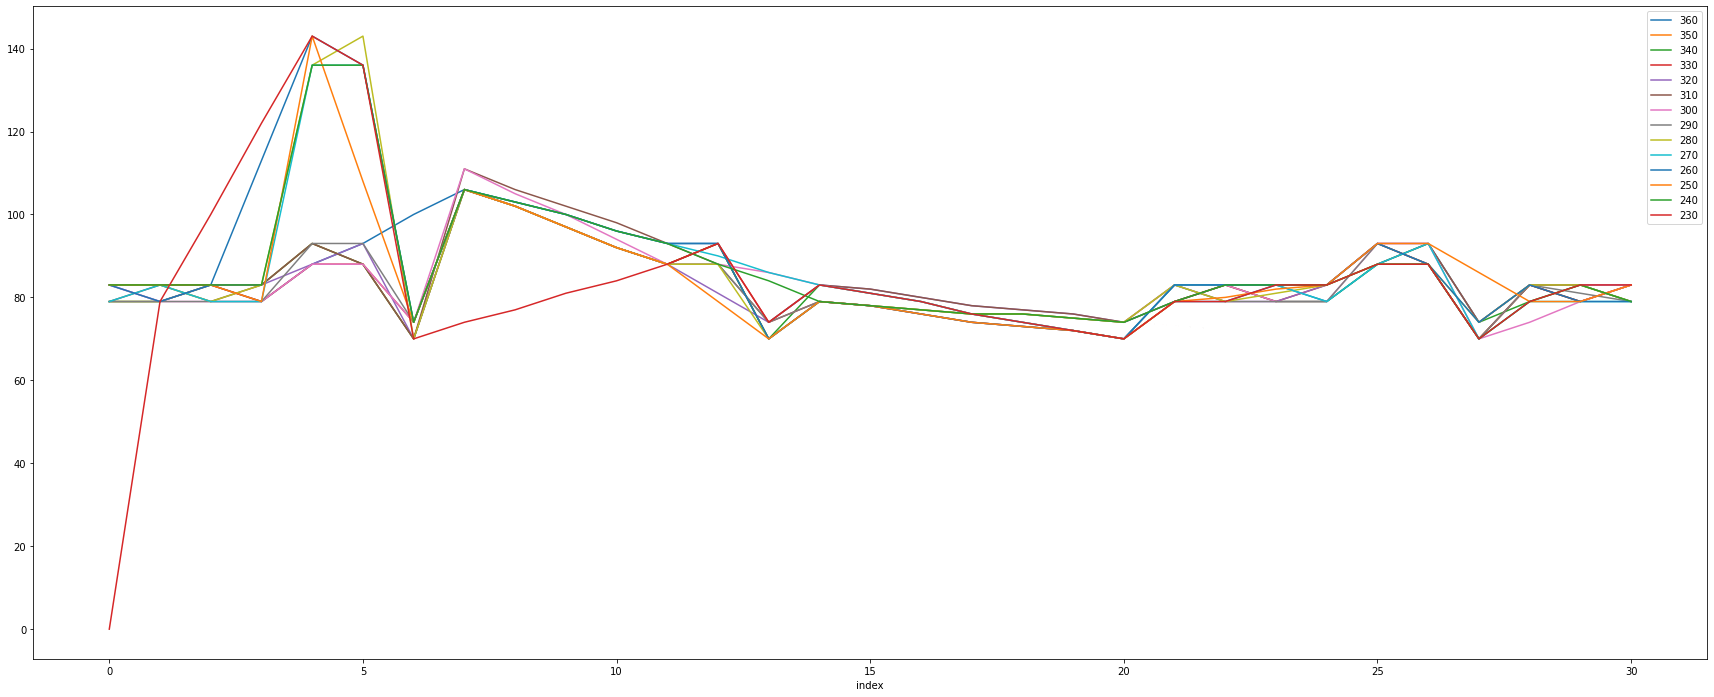

In [ ]:
import matplotlib.pyplot as plt

# Visualize the hotel dataframe for 30 dates starting from 360
columns = df_246.columns[1:31].tolist()

# Enable the below line to visualize for all the lead times
# columns = df_246.columns.tolist()

df_246.plot(x="index", y=columns,
        kind="line", figsize=(30, 12))
 
# display plot
plt.show()

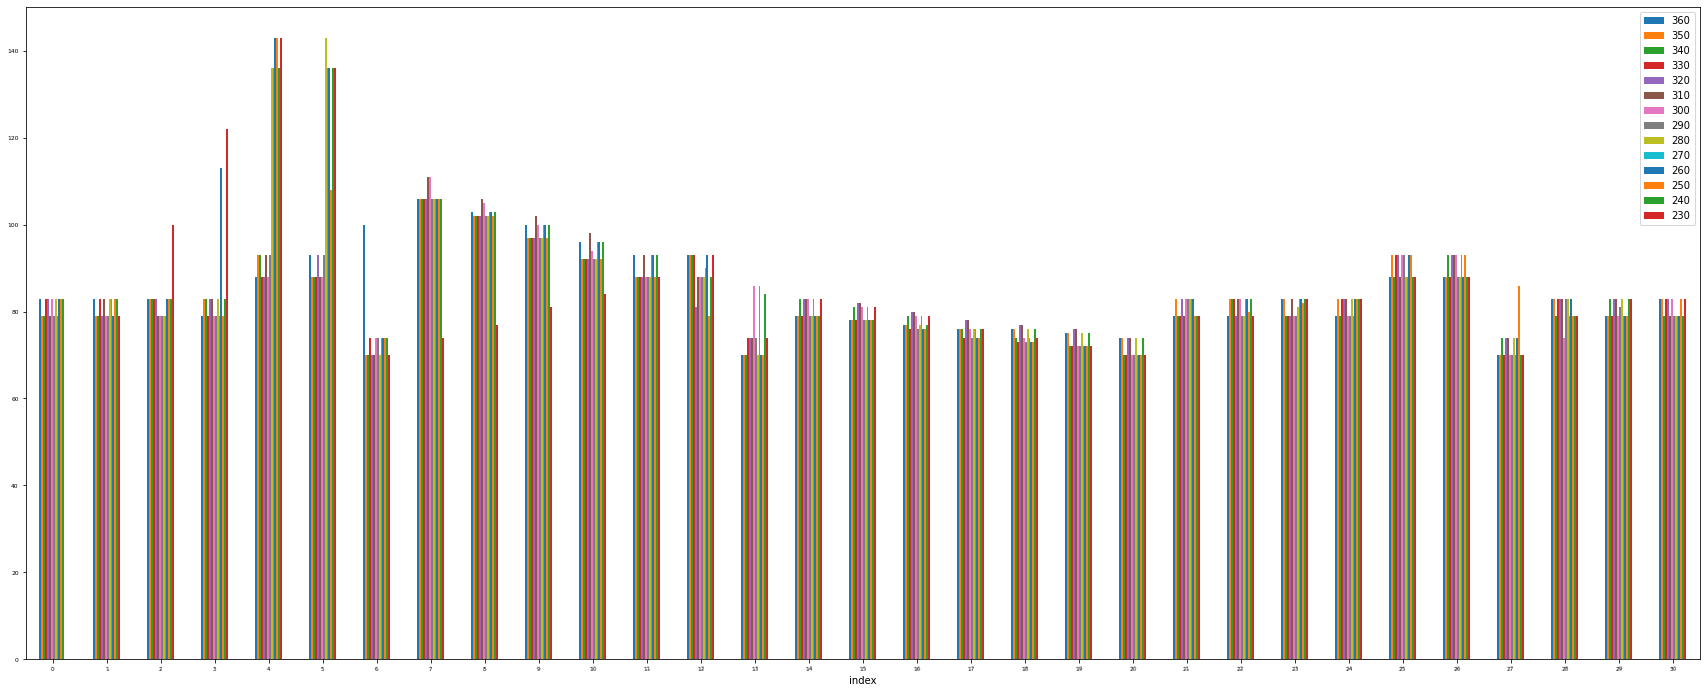

In [ ]:
# columns = df_246.columns[1:15].tolist()
df_246.plot(x="index", y=columns,
        kind="bar", rot=5, fontsize=6, figsize=(30, 12))
 
# display plot
plt.show()

where `hotelid` is the unique id number assigned for each hotel (consistent for all files). 

Each row of this table contains the evolution of LAR over time.

For a single target date, the rates were collected numerous times, e.g. 360, 350, 340, 330, ..., 1, 0 days before the target date.

We call the number of days until the target date the `lead time`.

In [ ]:
lead_times = df.keys()
print(lead_times)

Index(['360', '350', '340', '330', '320', '310', '300', '290', '280', '270',
       '260', '250', '240', '230', '220', '210', '200', '190', '180', '170',
       '160', '150', '130', '120', '110', '100', '90', '80', '76', '70', '68',
       '60', '56', '52', '38', '36', '34', '32', '30', '28', '27', '26', '25',
       '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14', '13',
       '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0'],
      dtype='object')


The snapshot date (the date when the data was collected) has a straightforward relationship with the target date and lead time: 

$$ snapshot\_date = target\_date - lead\_time $$

In [ ]:
snapshot_dates = [target_date - timedelta(days=int(lead_time)) for lead_time in lead_times]
print(snapshot_dates[0:3])

[datetime.date(2018, 7, 16), datetime.date(2018, 7, 26), datetime.date(2018, 8, 5)]


You can use PlotMaker to visualaze the rates:

In [ ]:
# HotelIds = [35, 37, 42]
HotelIds = df.index.tolist() 
# HotelIds = df.index.tolist()[:20]
fig = PlotMaker.plot_LAR(df, target_date, HotelIds)
fig.show()

Now we will visualize the data for target dates for each hotel. We will compare three hotels for this and based on above and below visualizations we will try to infer some results for the asked questions. We cannot select all the hotesl or all the target dates for below visualizations. we will try few of them as the data is too huge and the resource is limited.

In [7]:
target_date = date(2019,7,15)

In [8]:
# read dataframse based on converted fillna csvs
df_66041 = pd.read_csv('./hotelwise_data_clean/fillna/df_66041.csv')
df_66041.head()

,360,350,340,330,320,310,300,290,280,270,...,9,8,7,6,5,4,3,2,1,0
0,0.0,0.0,393.0,393.0,393.0,393.0,393.0,397.0,393.0,398.0,...,0.0,0.0,64.0,64.0,66.0,0.0,66.0,64.0,0.0,0.0
1,0.0,0.0,393.0,393.0,393.0,393.0,393.0,397.0,398.0,402.0,...,64.0,66.0,64.0,66.0,66.0,66.0,66.0,66.0,64.0,0.0
2,0.0,0.0,397.0,393.0,393.0,393.0,393.0,397.0,398.0,398.0,...,64.0,64.0,66.0,66.0,66.0,66.0,66.0,64.0,0.0,0.0
3,0.0,393.0,393.0,393.0,393.0,393.0,393.0,393.0,402.0,398.0,...,64.0,66.0,66.0,66.0,66.0,66.0,66.0,62.0,66.0,62.0
4,0.0,393.0,397.0,0.0,393.0,393.0,393.0,397.0,398.0,398.0,...,75.0,77.0,77.0,0.0,77.0,77.0,77.0,77.0,73.0,0.0


In [9]:
df_81659 = pd.read_csv('./hotelwise_data_clean/fillna/df_81659.csv')
df_35 = pd.read_csv('./hotelwise_data_clean/fillna/df_35.csv')

In [10]:
dict_of_dfs = {
    "df_66041": df_66041,
    "df_81659": df_81659,
    "df_35": df_35
}

In [16]:
for k in dict_of_dfs.keys():
  target_dates_in_df = dict_of_dfs[k].index.tolist()
  fig = PlotMaker.plot_LAR_hotel(k.split("_")[1], dict_of_dfs[k], target_date, target_dates_in_df)

  fig.show()

In [17]:
# read dataframse based on converted spline csvs
df_66041 = pd.read_csv('./hotelwise_data_clean/spline/df_66041.csv')
df_81659 = pd.read_csv('./hotelwise_data_clean/spline/df_81659.csv')
df_35 = pd.read_csv('./hotelwise_data_clean/spline/df_35.csv')

In [18]:
dict_of_dfs = {
    "df_66041": df_66041,
    "df_81659": df_81659,
    "df_35": df_35
}

In [19]:
for k in dict_of_dfs.keys():
  target_dates_in_df = dict_of_dfs[k].index.tolist()
  fig = PlotMaker.plot_LAR_hotel(k.split("_")[1], dict_of_dfs[k], target_date, target_dates_in_df)

  fig.show()

Spline is more smooth than fillna dataframes and are more informative. Similarly, other csvs from other methods can be used to look up the visualization and answer the below questions.

# Problems:

- is it possible to find that hotel "A" follows rate changes of hotel "B" in their pricing decisions?

  * It is possible to do this as from above visualizations we can see many hotels are following the same trend and seasonality for the given time series data.
  
- is it possible to identify features that predict the behavior of the rates in the future (for a fixed target date)?

  * As not much features are given here but just the lead times, still the behaviour of rates can be predicted for a fixed target date using some machine learning modeling like ARIMA etc. The features like the lead times can be grouped into quarters of the year and later other results could be predicted. For this, we can involve subset of the hotels and subset of lead times which can be more useful. However, for this I am not very sure.

- is it possible to identify the outstanding pricing decision of a single hotel?
  * Yes, this we can see from the last visualization where we plotted the year data(lead times) for each hotel against all the target dates. Using this, for a single hotel it is feasible.